In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load the data (assuming the file is in the working directory)
df = pd.read_csv('../data/BrentOilPrices.csv')
df.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [24]:

# Drop rows with missing values in Date or Price columns
df = df.dropna(subset=['Date', 'Price'])

# Check for duplicate dates and handle them if necessary
df = df.drop_duplicates(subset=['Date'])




In [25]:

# Sort the data by date
df = df.sort_values(by='Date').reset_index(drop=True)

# Display basic information about the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    9011 non-null   datetime64[ns]
 1   Price   9011 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 140.9 KB
None
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


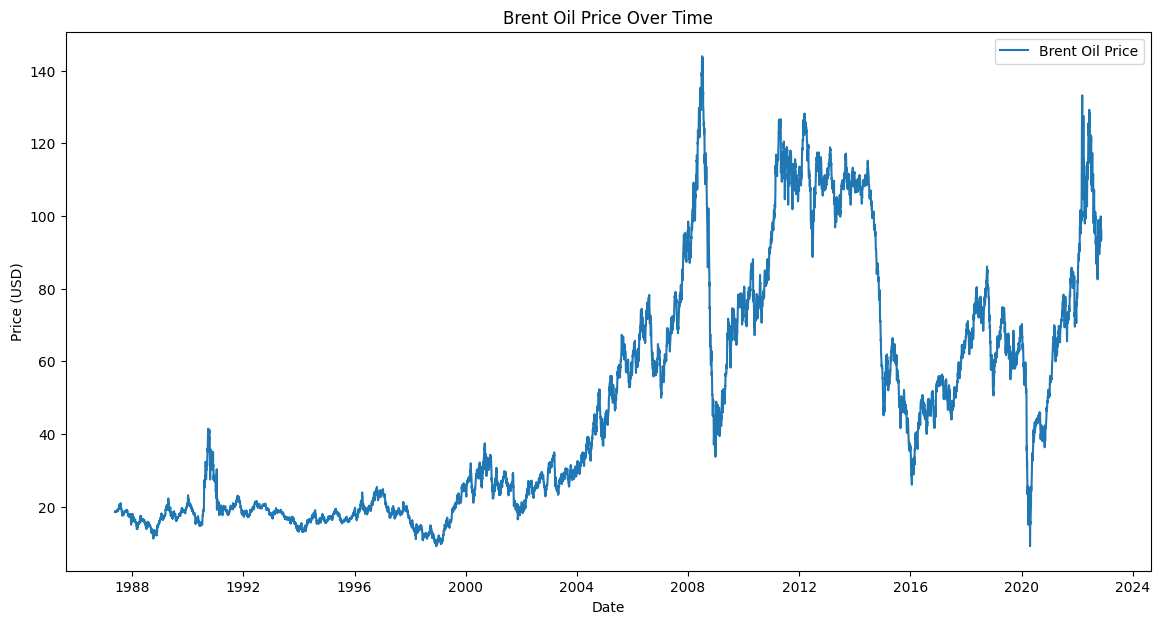

In [27]:
# Plot the historical Brent oil price trend
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Brent Oil Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Brent Oil Price Over Time')
plt.legend()
plt.show()




In [30]:
# Descriptive statistics
print(df['Price'].describe())

count    9011.000000
mean       48.420782
std        32.860110
min         9.100000
25%        19.050000
50%        38.570000
75%        70.090000
max       143.950000
Name: Price, dtype: float64


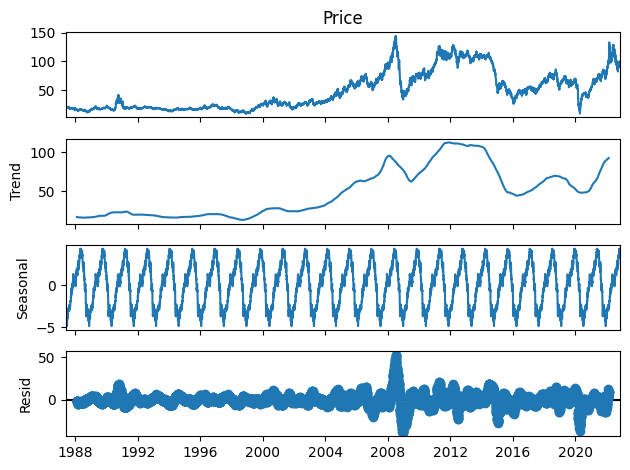

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df.set_index('Date')['Price'], model='additive', period=365)
result.plot()
plt.show()

